## ESD Analysis

Problem statement -

1. The correlation is  (if there is any) between the supplier shipping  performance and the loaded/broken ESD.

2. Which supplier is the major offender?

3. How many parts are produced by supplier and how often does the ESD break/is met.





## Initial Data Exploration and Column Review



1. Supplier Code - The assigned supplier code which uniquely identifies each supplier for Caterpillar

2. Supplier Name - The supplier name (Company name) for each expeditor.

3. ID Part - Part number uniquely identifies each part.

4. PTName - Name of the part that is designated to each part number.

5. PS QTY - The quantity to be shipped by supplier based on past due considerations.

6. Root Cause (What Happened/ Why) - Root cause report submitted by supplier on what is the reason behind delay of shipments.

7. Responsible - The responsibility of shipment delays which inclues Cat-buyer and Supplier.

8. Target date - The target date is the date that is given by supplier to achieve the specified date.

9. Cell - Categorical data used to categorize the parts into different cells.

10. Standard Root Cause Header - The reason why the part is delayed.

11. Standard root cause detail - The main reason for the delay in supplier shipment.

12. PS value - Value of the part in dollars.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file_path = '/content/drive/My Drive/ESD_analysis-Caterpillar/ESD_Analysis_data.xlsx'

df = pd.read_excel(file_path)

df.head()


,Supplier_code,Supplier_Name,Part_num,Part_name,Ps_Qty,Root_Cause,Corrective_Action,Responsible,Target_date,cell,Standard_root_cause,Standard_root_cause_detail,Ps_Value
0,A5186F0,K & M MACHINE FABRICATING,2451550,ARM AS - BR,1.0,NaN,The issue was delay in plate delivery and stre...,SUPPLIER,NaN,M,Production Delay,Raw Material Constraint,400000.000
1,P1795V0,SENSATA TECHNOLOGIES,6099131,SENSOR GP P,2937.0,NaN,Supplier SENSATA TECHNOLOGIES has moved to con...,CAT - BUYER,NaN,M,Production Delay,Supplier in CT,357500.451
2,F7849B0,EBCO INDUSTRIES,4407306,SWIVEL AS,22.0,NaN,Supplier was facing delay in receiving the pac...,SUPPLIER,NaN,M,Production Delay,Raw Material Constraint,187968.000
3,G2277V0,WALCO TOOL & ENGINEERING,6556367,CARRIER-MACH,8.0,NaN,Lead time for the component incraesed since m...,SUPPLIER,NaN,M,Production Delay,1st Schedule to Supplier,162320.000
4,J3415J0,GS GLOBAL RESOURCES,4169877,VALVE GP-BAS,69.0,NaN,Supplier has confirmed that the Leadtime for t...,CAT,NaN,M,Production Delay,Lead Time MOQ Alignment,161839.914


- Columns have been renamed, To get a better understanding of column headers and nomenclature.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Supplier_code               364 non-null    object 
 1   Supplier_Name               409 non-null    object 
 2   Part_num                    409 non-null    object 
 3   Part_name                   409 non-null    object 
 4   Ps_Qty                      409 non-null    float64
 5   Root_Cause                  356 non-null    object 
 6   Corrective_Action           395 non-null    object 
 7   Responsible                 396 non-null    object 
 8   Target_date                 287 non-null    object 
 9   cell                        409 non-null    object 
 10  Standard_root_cause         409 non-null    object 
 11  Standard_root_cause_detail  409 non-null    object 
 12  Ps_Value                    409 non-null    float64
dtypes: float64(2), object(11)
memory us

### Checking for nan values and imputing the NaN with specific fillers.

In [4]:
### Checking for nan values.

df.isna().sum().sort_values(ascending=False)

,0
Target_date,123
Root_Cause,54
Supplier_code,46
Corrective_Action,15
Responsible,14
Ps_Qty,1
Part_name,1
Part_num,1
Supplier_Name,1
cell,1


In [5]:
### Dropping the NaN values

df = df.dropna(subset=['Supplier_code','Supplier_Name'])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 0 to 408
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Supplier_code               363 non-null    object 
 1   Supplier_Name               363 non-null    object 
 2   Part_num                    363 non-null    object 
 3   Part_name                   363 non-null    object 
 4   Ps_Qty                      363 non-null    float64
 5   Root_Cause                  310 non-null    object 
 6   Corrective_Action           349 non-null    object 
 7   Responsible                 350 non-null    object 
 8   Target_date                 246 non-null    object 
 9   cell                        363 non-null    object 
 10  Standard_root_cause         363 non-null    object 
 11  Standard_root_cause_detail  363 non-null    object 
 12  Ps_Value                    363 non-null    float64
dtypes: float64(2), object(11)
memory usage: 

In [7]:
### For Missing values in PS_Quantity and PS_Value, Filling with 0.

df['Ps_Qty'] = df['Ps_Qty'].fillna(0)
df['Ps_Value'] = df['Ps_Value'].fillna(0)



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 0 to 408
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Supplier_code               363 non-null    object 
 1   Supplier_Name               363 non-null    object 
 2   Part_num                    363 non-null    object 
 3   Part_name                   363 non-null    object 
 4   Ps_Qty                      363 non-null    float64
 5   Root_Cause                  310 non-null    object 
 6   Corrective_Action           349 non-null    object 
 7   Responsible                 350 non-null    object 
 8   Target_date                 246 non-null    object 
 9   cell                        363 non-null    object 
 10  Standard_root_cause         363 non-null    object 
 11  Standard_root_cause_detail  363 non-null    object 
 12  Ps_Value                    363 non-null    float64
dtypes: float64(2), object(11)
memory usage: 

In [9]:
### For the text columns using 'Unknown' word to fill the NaN values.

text_cols = ['Standard_root_cause', 'Standard_root_cause_detail','Corrective_Action','Responsible','Root_Cause']

df[text_cols] = df[text_cols].fillna('Unknown')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 0 to 408
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Supplier_code               363 non-null    object 
 1   Supplier_Name               363 non-null    object 
 2   Part_num                    363 non-null    object 
 3   Part_name                   363 non-null    object 
 4   Ps_Qty                      363 non-null    float64
 5   Root_Cause                  363 non-null    object 
 6   Corrective_Action           363 non-null    object 
 7   Responsible                 363 non-null    object 
 8   Target_date                 246 non-null    object 
 9   cell                        363 non-null    object 
 10  Standard_root_cause         363 non-null    object 
 11  Standard_root_cause_detail  363 non-null    object 
 12  Ps_Value                    363 non-null    float64
dtypes: float64(2), object(11)
memory usage: 

In [11]:
#### The Target_date column has no impact on the analysis and contains maximum number of NaN values. Hence we can drop the column.

df= df.drop(columns=['Target_date'])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 0 to 408
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Supplier_code               363 non-null    object 
 1   Supplier_Name               363 non-null    object 
 2   Part_num                    363 non-null    object 
 3   Part_name                   363 non-null    object 
 4   Ps_Qty                      363 non-null    float64
 5   Root_Cause                  363 non-null    object 
 6   Corrective_Action           363 non-null    object 
 7   Responsible                 363 non-null    object 
 8   cell                        363 non-null    object 
 9   Standard_root_cause         363 non-null    object 
 10  Standard_root_cause_detail  363 non-null    object 
 11  Ps_Value                    363 non-null    float64
dtypes: float64(2), object(10)
memory usage: 36.9+ KB


- Exploratory data Analysis: Creating visuals and charts for better insights and understanding.

In [13]:
import plotly.express as px

Visual representation of how many parts are produced by supplier using Scatter chart.

In [14]:
fig = px.strip(df,x='Part_num',y='Ps_Qty',color='Supplier_Name',title='Parts produced by Supplier')
fig.show()

- Danfoss Power solutions produces most number of parts.
The parts produced are more than 3M in quantity.

Checking the correlation between the PS qty and PS value of the part.

In [16]:
df[['Ps_Qty','Ps_Value']].corr()

,Ps_Qty,Ps_Value
Ps_Qty,1.00000,0.05698
Ps_Value,0.05698,1.00000


There is a postive correlation between the Quantity shipped and the PS value of the part, The PS value is determined by the dealer.

### Defining Supplier shipping performance and ESD Status.

In [17]:
df['is_ESD_broken'] = df.apply(lambda x: 1 if (str(x['Standard_root_cause_detail']).lower() in ['production delay','raw material constraint','supplier delay']
                                               or str(x['Responsible']).lower() == 'supplier') else 0,axis=1)

df['is_loaded_ESD'] = df['is_ESD_broken'].apply(lambda x: 0 if x == 1 else 1)

In [18]:
df.head()

,Supplier_code,Supplier_Name,Part_num,Part_name,Ps_Qty,Root_Cause,Corrective_Action,Responsible,cell,Standard_root_cause,Standard_root_cause_detail,Ps_Value,is_ESD_broken,is_loaded_ESD
0,A5186F0,K & M MACHINE FABRICATING,2451550,ARM AS - BR,1.0,Unknown,The issue was delay in plate delivery and stre...,SUPPLIER,M,Production Delay,Raw Material Constraint,400000.000,1,0
1,P1795V0,SENSATA TECHNOLOGIES,6099131,SENSOR GP P,2937.0,Unknown,Supplier SENSATA TECHNOLOGIES has moved to con...,CAT - BUYER,M,Production Delay,Supplier in CT,357500.451,0,1
2,F7849B0,EBCO INDUSTRIES,4407306,SWIVEL AS,22.0,Unknown,Supplier was facing delay in receiving the pac...,SUPPLIER,M,Production Delay,Raw Material Constraint,187968.000,1,0
3,G2277V0,WALCO TOOL & ENGINEERING,6556367,CARRIER-MACH,8.0,Unknown,Lead time for the component incraesed since m...,SUPPLIER,M,Production Delay,1st Schedule to Supplier,162320.000,1,0
4,J3415J0,GS GLOBAL RESOURCES,4169877,VALVE GP-BAS,69.0,Unknown,Supplier has confirmed that the Leadtime for t...,CAT,M,Production Delay,Lead Time MOQ Alignment,161839.914,0,1


We have mapped the
- Broken ESD to Supplier delay or Raw Material issue

Loaded/Met ESD
- No supplier related root cause.

### Aggregating supplier level performance.

In [19]:
supplier_perf = (
    df.groupby('Supplier_Name').agg(
        total_parts=('Part_num','count'),
        total_qty=('Ps_Qty','sum'),
        total_value=('Ps_Value','sum'),
        broken_ESD=('is_ESD_broken','sum'),
        loaded_ESD=('is_loaded_ESD','sum')

    ).reset_index()
)

supplier_perf['broken_ESD_perc'] = (supplier_perf['broken_ESD']/supplier_perf['total_parts'])*100
supplier_perf['loaded_ESD_perc'] = (supplier_perf['loaded_ESD']/supplier_perf['total_parts'])*100
supplier_perf.head()

,Supplier_Name,total_parts,total_qty,total_value,broken_ESD,loaded_ESD,broken_ESD_perc,loaded_ESD_perc
0,10G,2,46.0,102833.920,2,0,100.0,0.0
1,AAA SALES & ENGINEERING (OAK CREEK),2,14.0,25401.740,2,0,100.0,0.0
2,ABB GENERATORS,2,2.0,208500.000,0,2,0.0,100.0
3,ADVANCED CAST PRODUCTS MEADVILLE,2,825.0,103639.145,2,0,100.0,0.0
4,AIR RADIATORS THAILAND 7 284 MOO6 AMATA INDUST...,3,30.0,128562.581,3,0,100.0,0.0


Correlation between Supplier shipping Performance and Broken/loaded ESD

- Checking how supplier shipping outcomes(broken vs. loaded) correlate with Performance indicators such as PS value and quantity.

In [20]:
corr = supplier_perf[['broken_ESD_perc','loaded_ESD_perc','total_qty','total_value']].corr()
corr

,broken_ESD_perc,loaded_ESD_perc,total_qty,total_value
broken_ESD_perc,1.000000,-1.000000,-0.007743,0.015363
loaded_ESD_perc,-1.000000,1.000000,0.007743,-0.015363
total_qty,-0.007743,0.007743,1.000000,0.105738
total_value,0.015363,-0.015363,0.105738,1.000000


- Positive correlation between broken_esd_perc and total_ps_value - High value suppliers tend to break ESD more often.

- Negative correlation - They meet ESD better.

#### 2. Identify the Major Offender

In [22]:
major_offender = supplier_perf.sort_values(by='broken_ESD_perc',ascending=False).head(1)
major_offender[['Supplier_Name','broken_ESD_perc','broken_ESD','total_parts']]

,Supplier_Name,broken_ESD_perc,broken_ESD,total_parts
0,10G,100.0,2,2


The Supplier 10G is the major Offender with a broken_ESD_perc of 100% and shipments being low.

### Visualizing the Major offender

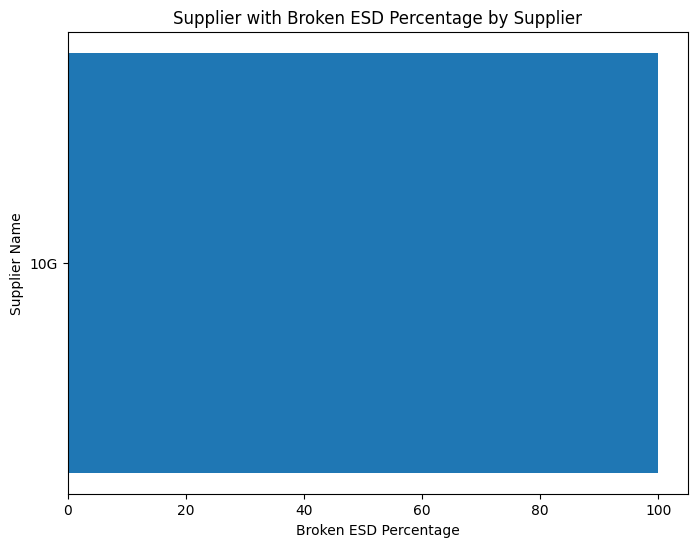

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(major_offender['Supplier_Name'],major_offender['broken_ESD_perc'])
plt.xlabel('Broken ESD Percentage')
plt.ylabel('Supplier Name')
plt.title('Supplier with Broken ESD Percentage by Supplier')
plt.show()

3. How many parts are produced by each supplier and how often ESD breaks are met?

In [30]:
supplier_perf_summary = supplier_perf[['Supplier_Name','total_parts','broken_ESD','loaded_ESD','broken_ESD_perc','loaded_ESD_perc']]
supplier_perf_summary.sort_values(by='total_parts',ascending=False).head(10)

,Supplier_Name,total_parts,broken_ESD,loaded_ESD,broken_ESD_perc,loaded_ESD_perc
97,M/S CASTCO,10,10,0,100.000000,0.000000
144,SEARS MANUFACTURING (DAVENPORT) (2),10,0,10,0.000000,100.000000
32,CATERPILLAR INDIA - IECC,8,0,8,0.000000,100.000000
44,DRIVE LINE,7,2,5,28.571429,71.428571
177,WOODWARD,7,7,0,100.000000,0.000000
63,GARRETT MOTION INC.,7,7,0,100.000000,0.000000
41,DANFOSS POWER SOLUTIONS II LLC,6,3,3,50.000000,50.000000
10,AMERICAN CABLE (PHILADELPHIA) (2),6,2,4,33.333333,66.666667
91,LEONI WIRING SYSTEMS PUNE PVT. LTD.,6,0,6,0.000000,100.000000
65,GLOBAL MINING MILWAUKEE (VIRTUAL FACTORY),5,0,5,0.000000,100.000000


Barplot to check the supplier performance of best suppliers top 10.

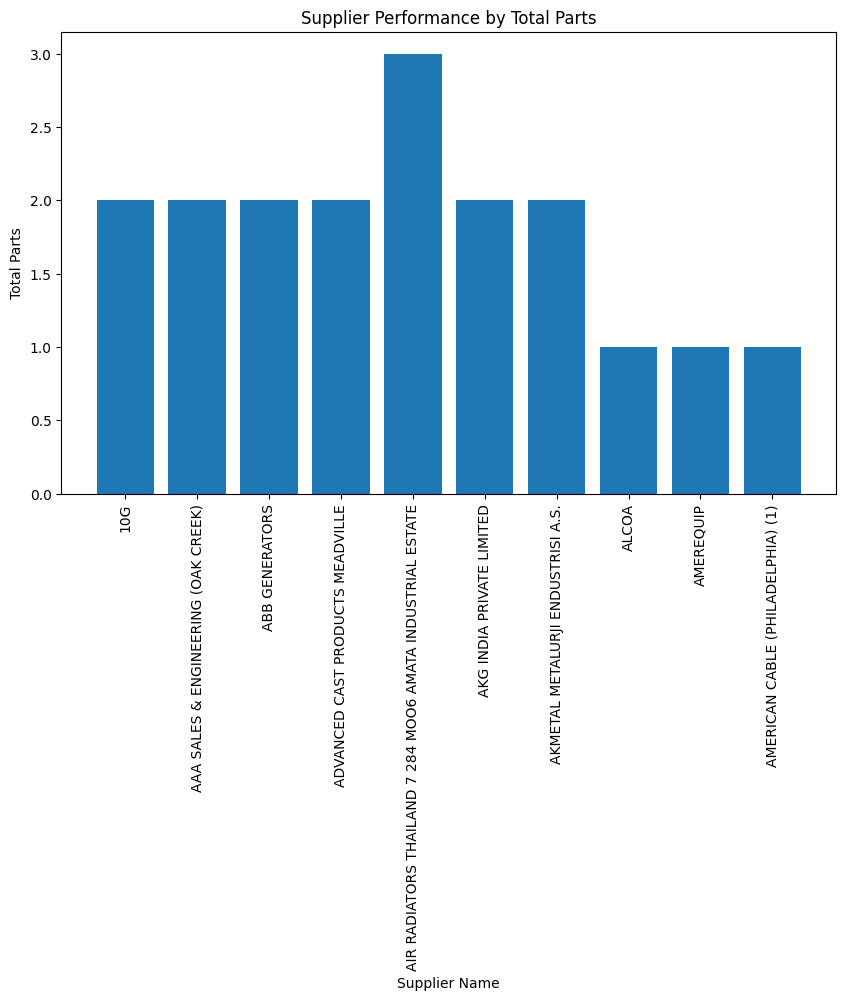

In [33]:
bar_fig = plt.figure(figsize=(10,6))
plt.bar(supplier_perf_summary['Supplier_Name'][:10],supplier_perf_summary['total_parts'][:10])
plt.xlabel('Supplier Name')
plt.ylabel('Total Parts')
plt.title('Supplier Performance by Total Parts')
plt.xticks(rotation=90)
plt.show()